In [1]:
import pandas as pd


In [3]:
## Data Ingestions step
df=pd.read_csv('data/Diamond.csv')

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,0.00,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df.isnull().sum()

id              0
carat           0
cut             0
color           0
clarity         0
depth           0
table           0
x               0
y               0
z          128037
price           0
dtype: int64

#### No missing value in data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        65536 non-null   float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df['z'] = df['z'].str.replace(' ', '0')

AttributeError: Can only use .str accessor with string values!

In [8]:
df['z']=df['z'].astype(float)

In [9]:
df.info()
df.to_csv('Diamond.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        65536 non-null   float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [10]:
## Drop ID column for no use in future purpose
df.drop(labels=['id'],axis=1,inplace=True)

In [11]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,0.00,13387


In [12]:
## Check for Duplicate records
df.duplicated().sum()

np.int64(31)

In [13]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)

In [14]:
## Duplicates removed
df.duplicated().sum()   

np.int64(0)

In [14]:
## Segreget numerical and categorical columns
numerical_cols = df.columns[df.dtypes != 'object' ]
categorical_cols = df.columns[df.dtypes == 'object' ]
print("Numerical Columns: ", numerical_cols)
print("Categorical Columns: ", categorical_cols)

Numerical Columns:  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns:  Index(['cut', 'color', 'clarity'], dtype='object')


In [15]:
df[categorical_cols].describe()

,cut,color,clarity
count,193542,193542,193542
unique,5,7,8
top,Ideal,G,SI1
freq,92429,44380,53271


In [16]:
df['cut'].value_counts()

cut
Ideal        92429
Premium      49907
Very Good    37564
Good         11621
Fair          2021
Name: count, dtype: int64

In [17]:
df['color'].value_counts()

color
G    44380
E    35864
F    34251
H    30797
D    24280
I    17514
J     6456
Name: count, dtype: int64

In [18]:
df['clarity'].value_counts()

clarity
SI1     53271
VS2     48008
VS1     30664
SI2     30484
VVS2    15759
VVS1    10626
IF       4218
I1        512
Name: count, dtype: int64

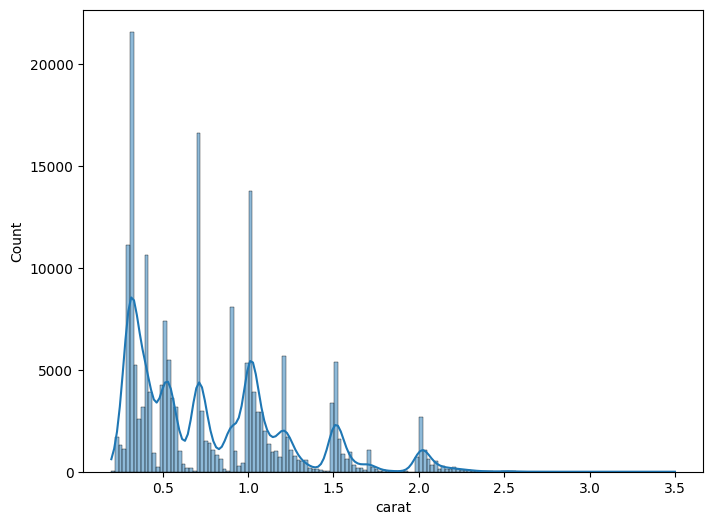

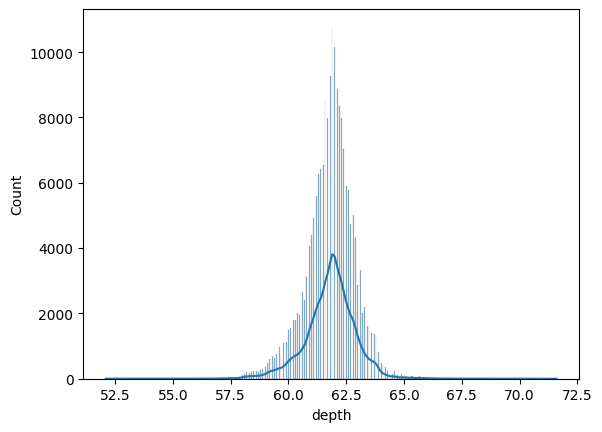

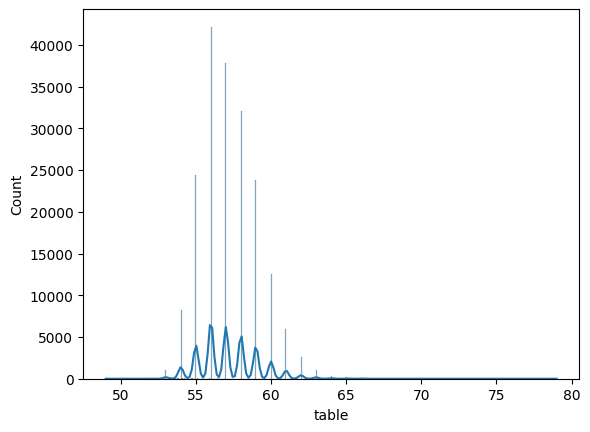

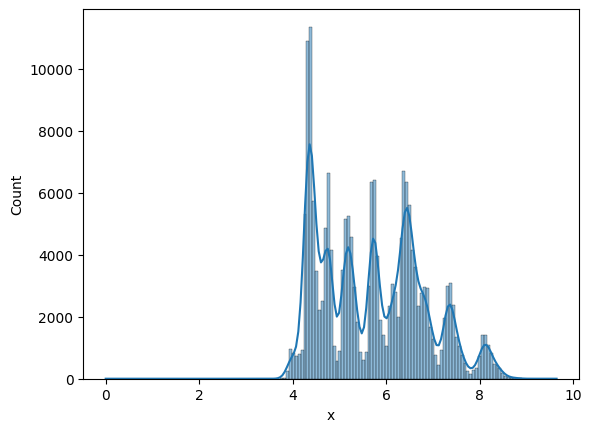

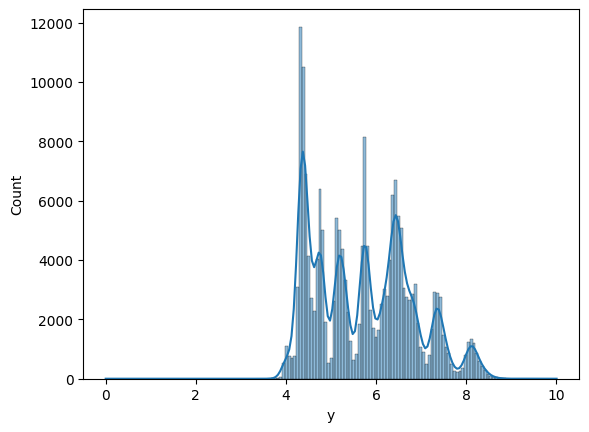

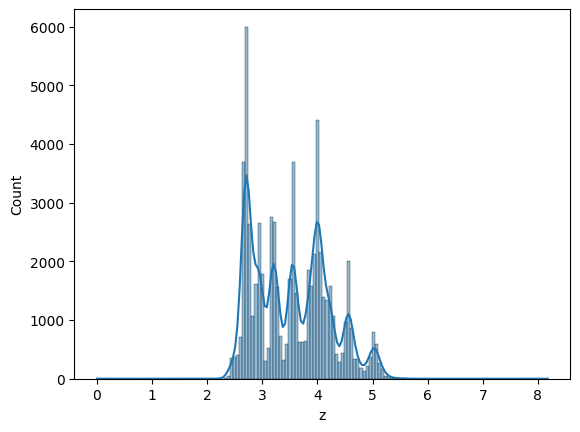

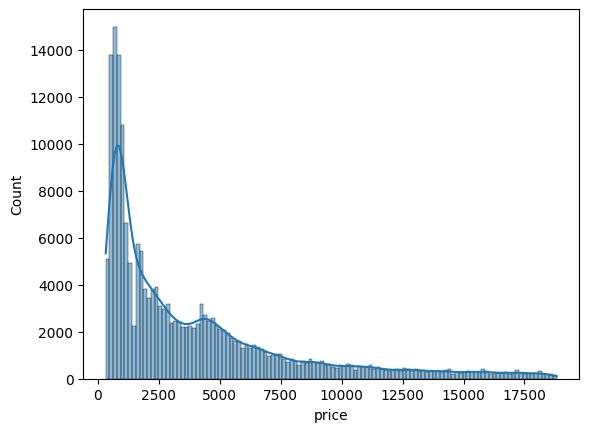

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_cols:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()


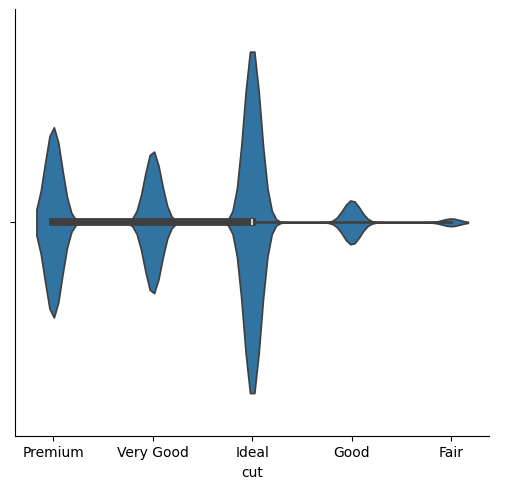

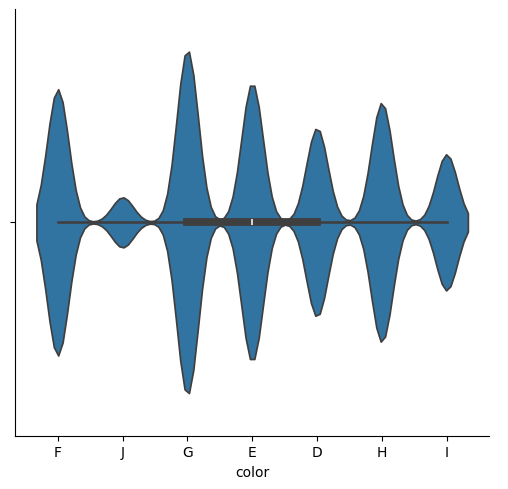

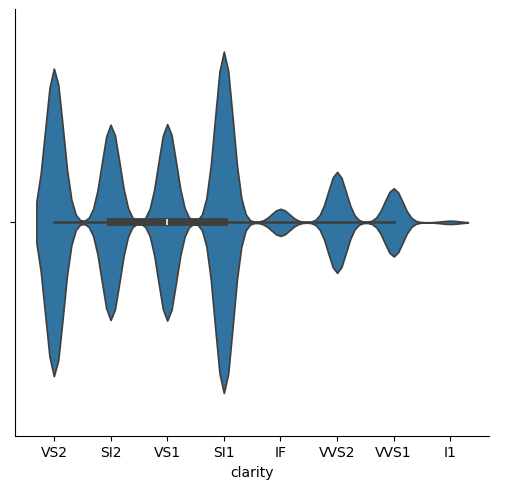

In [20]:
x=0
for i in categorical_cols:
    sns.catplot(data=df,x=i,kind='violin')
    print("\n")
    plt.show()

<Axes: >

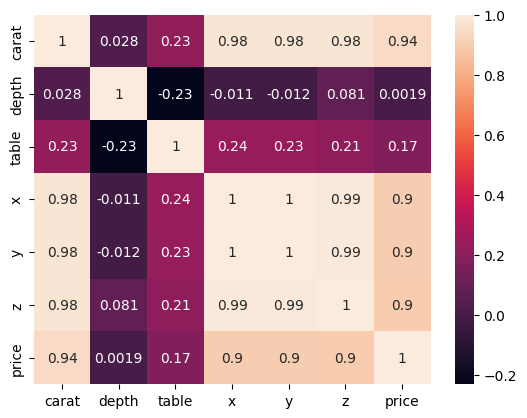

In [21]:
## correlation heatmap
sns.heatmap(df[numerical_cols].corr(),annot=True)

In [22]:
## here x,y,x are highly co-related and also internally 
# #correlated so we can drop any two of them to avoid multi-collinearity
# we can drop all three independent variables as they are not useful for prediction
# df.drop(labels=['x','y','z'],axis=1,inplace=True)

In [23]:

df.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,0.00,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772


In [24]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

#### these are ordinal categorical feature so we can rank them by domain expert advised

In [25]:
cut_map={'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1}

In [26]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [27]:
clarity_map={'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1}

In [28]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [29]:
color_map={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [30]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)


In [31]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,0.00,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
